In [1]:
import cPickle as pickle
import os
import numpy as np
import bob
import bob.io.base

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline


/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/bob.extension-2.0.11-py2.7.egg/bob/extension/__init__.py:12: UserWarning: Module bob was already imported from /home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/bob.io.base-2.0.8-py2.7-linux-x86_64.egg/bob/__init__.pyc, but /home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/bob.core-2.1.2-py2.7-linux-x86_64.egg is being added to sys.path
  import pkg_resources
/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/bob.extension-2.0.11-py2.7.egg/bob/extension/__init__.py:12: UserWarning: Module bob was already imported from /home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/bob.io.base-2.0.8-py2.7-linux-x86_64.egg/bob/__init__.pyc, but /home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/bob.blitz-2.0.8-py2.7-linux-x86_64.egg is being added to sys.path
  import pkg_resources
/home/bashir/.virtualenvs

In [2]:
import random
def load_chunk(path,chunk):
    os.chdir(path)
    data=bob.io.base.HDF5File('X_traindataset'+chunk+'.hdf5')
    X_train=data.read('frame')
    del data
    initial=random.randint(0,50)
    final=random.randint(0,50)

    X_train=X_train[:,initial:initial+150,final:final+150]
    data=open('Y_traindataset'+chunk+'.pkl','r')
    y_train=pickle.load(data)
    data.close()
    return X_train,y_train


def unpickle(file):
    f = open(file, 'rb')
    dict = pickle.load(f)
    f.close()
    return dict


net = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dense', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 150, 150),
    conv2d1_num_filters=20,
    conv2d1_filter_size=(5, 5),
    conv2d1_stride=(1, 1),
    conv2d1_pad=(2, 2),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    maxpool1_pool_size=(2, 2),
    conv2d2_num_filters=20,
    conv2d2_filter_size=(5, 5),
    conv2d2_stride=(1, 1),
    conv2d2_pad=(2, 2),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    maxpool2_pool_size=(2, 2),
    dense_num_units=1000,
    dense_nonlinearity=lasagne.nonlinearities.rectify,
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=11,
    update=nesterov_momentum,
    update_momentum=0.9,
    update_learning_rate=0.0001,
    max_epochs=100,
    verbose=True
)

In [3]:
path="/home/bashir/major_pro/dataset/store"
print path
chunk='0'
# import random
X_train,y_train=load_chunk(path,chunk)
size=X_train.shape[0]
X_train=X_train[:size/64,:,:,:]
# initial=random.randint(0,50)
# final=random.randint(0,50)


# X=X_train[initial:initial+150,final:final+150]
# print X.shape
# ax2=plt.subplot(1,2,2)
# plt.imshow(X)
# ax1=plt.subplot(1,2,1,sharex=ax2,sharey=ax2)
# plt.imshow(X_train.astype('uint8'))

print X_train.shape

/home/bashir/major_pro/dataset/store
(200, 150, 150, 3)


In [6]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[3],X_train.shape[1],X_train.shape[2]))

In [7]:
y_train=y_train[:size/64]
X_train.shape

(200, 3, 150, 150)

# A SAMPLE OF DATA AUGMENTATION

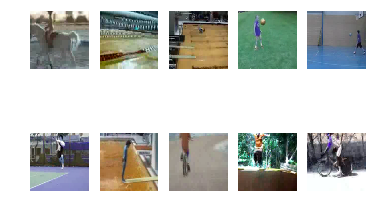

In [8]:
for i in range(10):
    plt.subplot(2,5,i+1)
    a=X_train.reshape((X_train.shape[0],X_train.shape[2],X_train.shape[3],X_train.shape[1]))
#     print X_train.shape
    plt.imshow(a[i])
    plt.subplot(2,5,i+1)
    plt.imshow(a[i])

    plt.axis('off')
plt.show()

In [9]:
print y_train.shape,X_train.shape

(200,) (200, 3, 150, 150)


In [10]:
nn=net.fit(X_train,y_train)

/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


# Neural Network with 27403551 learnable parameters

## Layer information

  #  name      size
---  --------  ----------
  0  input     3x150x150
  1  conv2d1   20x150x150
  2  maxpool1  20x75x75
  3  conv2d2   20x75x75
  4  maxpool2  20x37x37
  5  dense     1000
  6  output    11

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1     452.14938     187.73520      2.40844      0.11364  0.73s
      2     210.15723       4.90777     42.82133      0.13636  0.72s
      3       3.79478       2.39790      1.58254      0.11364  0.73s
      4       2.39790       2.39789      1.00001      0.11364  0.72s
      5       2.39788       2.39787      1.00001      0.11364  0.72s
      6       2.39785       2.39784      1.00000      0.11364  0.72s
      7       2.39781       2.39781      1.00000      0.11364  0.73s
      8       2.39776       2.39777      0.99999      0.11364  0.72s
      9       2.39771       2